In [66]:

def raw_universities_map_to_schedule(unis):
    # For each of the unis, make the time offset relative to UTC-5
    for uni in unis:
        unis[uni]["timezone_offset"] = unis[uni]["timezone_offset"] + 5
        for day in unis[uni]["unavailableTimes"]:
            for time in unis[uni]["unavailableTimes"][day]:
                time["start"] = 3 * (time["start"] + unis[uni]["timezone_offset"])
                # -1 because the end time is exclusive
                time["end"] = 3 * (time["end"] + unis[uni]["timezone_offset"]) - 1

    # For each of the unis, make it into distinct 20 minute time block arrays for each day of the week
    # from 8am to 7:20pm

    for uni in unis:
        for day in ['M', 'T', 'W', 'Th', 'F']:
            if not unis[uni].get('schedule'):
                unis[uni]['schedule'] = {}
            # for time in range(8, 20):
            unis[uni]['schedule'][day] = {
                # Meeting block that *starts at* the time is by default available
                time: False for time in range(8 * 3, 19 * 3)
            }

    # For each of the chairs, make 9:20-9:40, 2:20-2:40, and 12:20 to 1:00 unavailable for each day of the week
    for uni in unis:
        tz_offset = unis[uni]["timezone_offset"]
        for day in ['M', 'T', 'W', 'Th', 'F']:
            start_coffee_1 = (9 + tz_offset) * 3 + 1
            # Check if exists
            if start_coffee_1 in unis[uni]['schedule'][day]:
                unis[uni]['schedule'][day][start_coffee_1] = True

            start_coffee_2 = (14 + tz_offset) * 3 + 1
            # Check if exists
            if start_coffee_2 in unis[uni]['schedule'][day]:
                unis[uni]['schedule'][day][start_coffee_2] = True

            start_lunch = (12 + tz_offset) * 3 + 1
            for time in range(start_lunch, start_lunch + 2):
                # Check if exists
                if time in unis[uni]['schedule'][day]:
                    unis[uni]['schedule'][day][time] = True

    # For all of the unavailable times, make them unavailable in the schedule
    for uni in unis:
        for day in unis[uni]["unavailableTimes"]:
            for time in unis[uni]["unavailableTimes"][day]:
                for i in range(time["start"], time["end"]):
                    # Check if exists
                    if i in unis[uni]["schedule"][day]:
                        unis[uni]["schedule"][day][i] = True


In [67]:

def plot_schedule_map(unis):
    # Plot the schedule for each chair
    import matplotlib.pyplot as plt
    import numpy as np

    # Create a plot for each course
    for uni_id, data in unis.items():
        plt.figure(figsize=(10, 5))
        plt.title(f"Timetable for {uni_id} - {data['university']}")
        for day, schedule in data['schedule'].items():
            for hour, occupied in schedule.items():
                if occupied:
                    plt.plot(hour, day, 'bs', markersize=10)  # Blue square for occupied hours
                else:
                    plt.plot(hour, day, 'rs',
                             markersize=10)  # Red square for available hours
        plt.yticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
        plt.xlabel('Hour')
        plt.ylabel('Day of Week')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

## Plotting Availability

In [68]:
# By default, available from 8AM-7:20PM ET

# Unavailable time given the member
# Chairs 
# C1 The University of British Columbia M/W 10 to 12
# C2 University of Calgary T/Th 2 to 4
# C3 National Research Council Canada M/W 1 o 3
# C4 York University T/F 9 to 11
# C5 University of California – San Diego Th 8 to 12
# C6 Université de Sherbrooke W/F 10 to 12
# C7 University of Victoria T/Th 1 to 3
# C8 Université Laval Th 8 to 12
# C9 Hydro-Québec T/F 10 to 12
# C10 Canadian Food Inspection Agency M/F 11 to 2


# ChatGPT Prompt
#####
# 
# For each of these Universities, make a JSON file to encode the information, and the UTC timezone offset, with the keys C1, C2, etc.
# 
# For the unavailableTime, make it another object e.g. {
#   M: [10, 12],
#   W: [13, 16]
# }
# 
# ```
# # Chairs 
# # C1 The University of British Columbia M/W 10 to 12
# # C2 University of Calgary T/Th 2 to 4
# # C3 National Research Council Canada M/W 1 o 3
# # C4 York University T/F 9 to 11
# # C5 University of California – San Diego Th 8 to 12
# # C6 Université de Sherbrooke W/F 10 to 12
# # C7 University of Victoria T/Th 1 to 3
# # C8 Université Laval Th 8 to 12
# # C9 Hydro-Québec T/F 10 to 12
# # C10 Canadian Food Inspection Agency M/F 11 to 2
# ```
chairs = {
    "C1": {
        "university": "The University of British Columbia",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C2": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "T": [{"start": 14, "end": 16}],
            "Th": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -7
    },
    "C3": {
        "university": "National Research Council Canada",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "W": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "C4": {
        "university": "York University",
        "unavailableTimes": {
            "T": [{"start": 9, "end": 11}],
            "F": [{"start": 9, "end": 11}]
        },
        "timezone_offset": -5
    },
    "C5": {
        "university": "University of California – San Diego",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C6": {
        "university": "Université de Sherbrooke",
        "unavailableTimes": {
            "W": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C7": {
        "university": "University of Victoria",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -8
    },
    "C8": {
        "university": "Université Laval",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C9": {
        "university": "Hydro-Québec",
        "unavailableTimes": {
            "T": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C10": {
        "university": "Canadian Food Inspection Agency",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 14}],
            "F": [{"start": 11, "end": 14}]
        },
        "timezone_offset": -5
    }
}

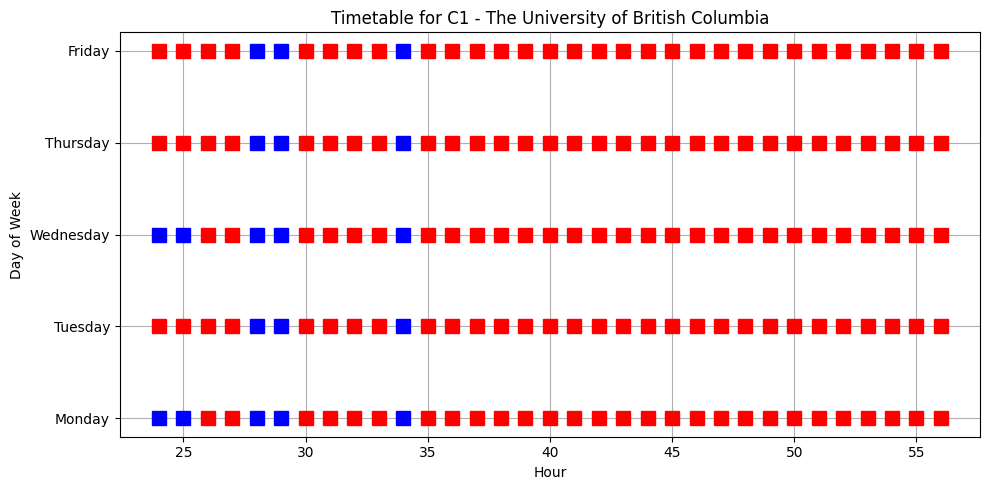

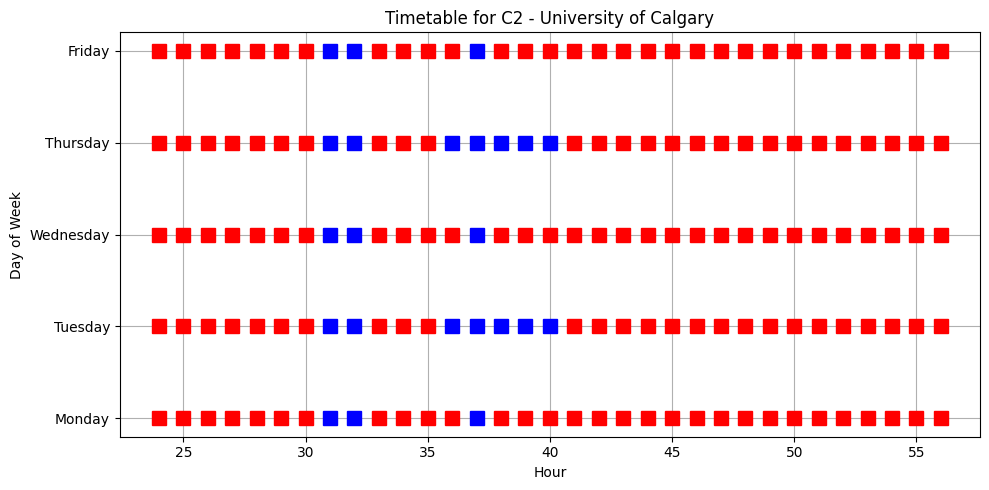

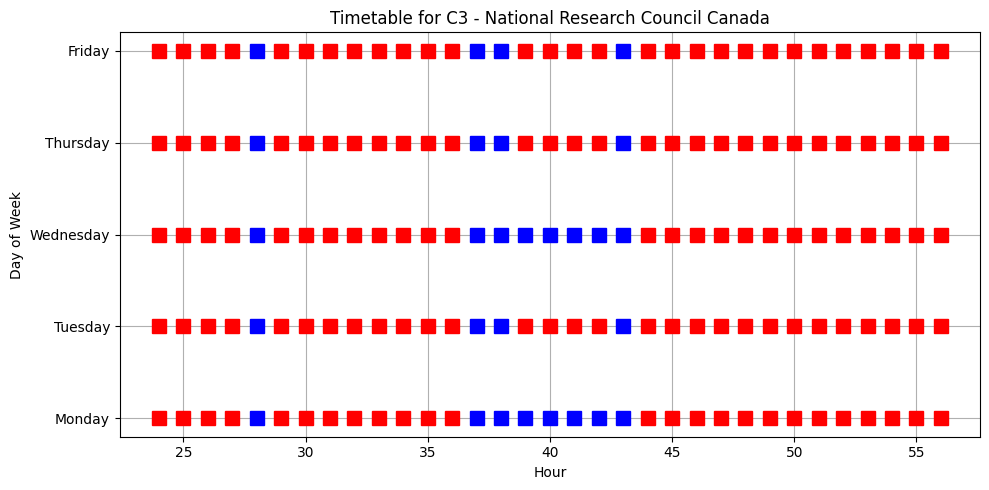

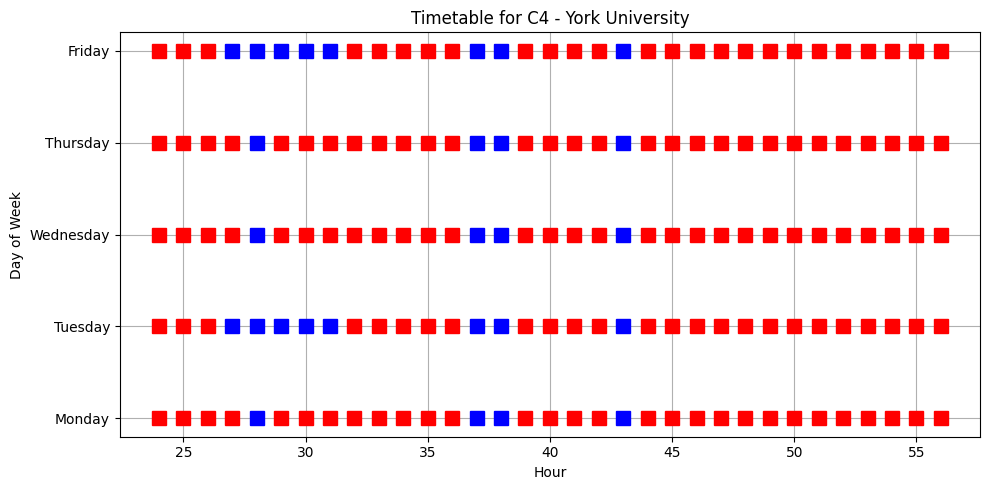

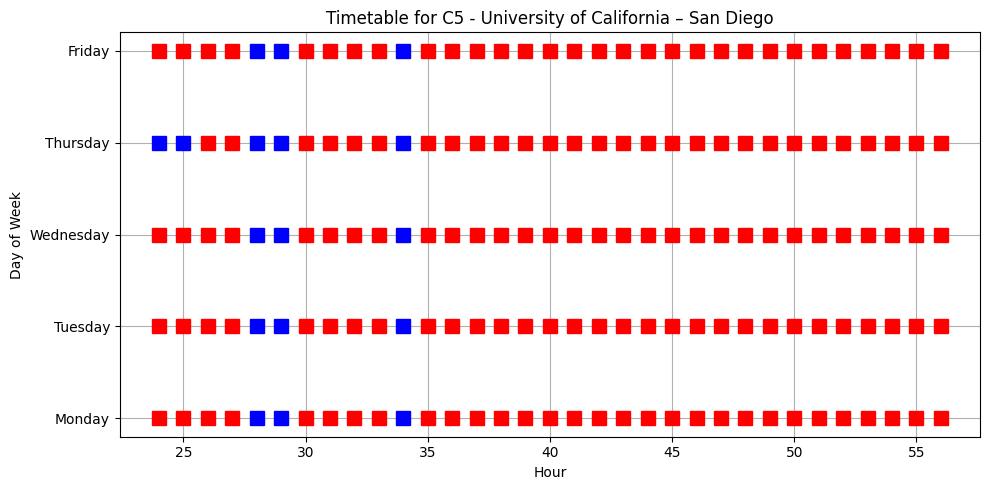

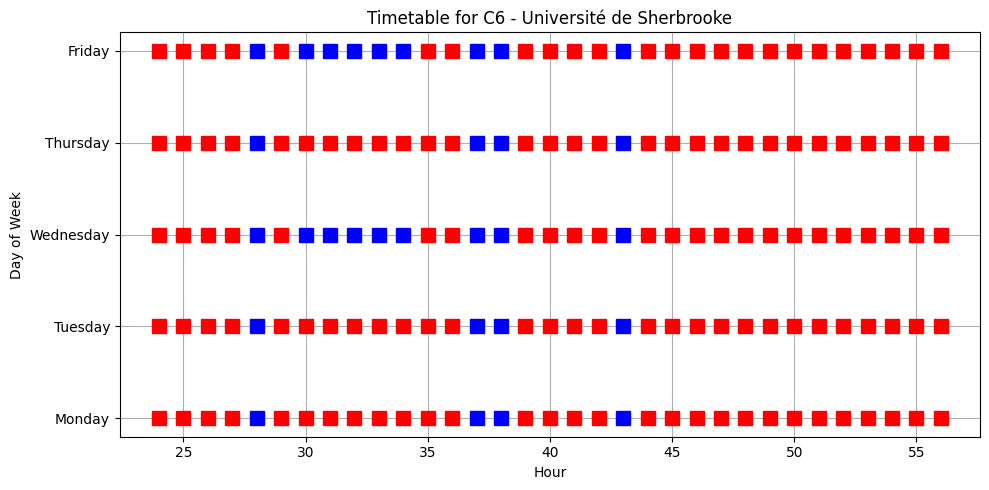

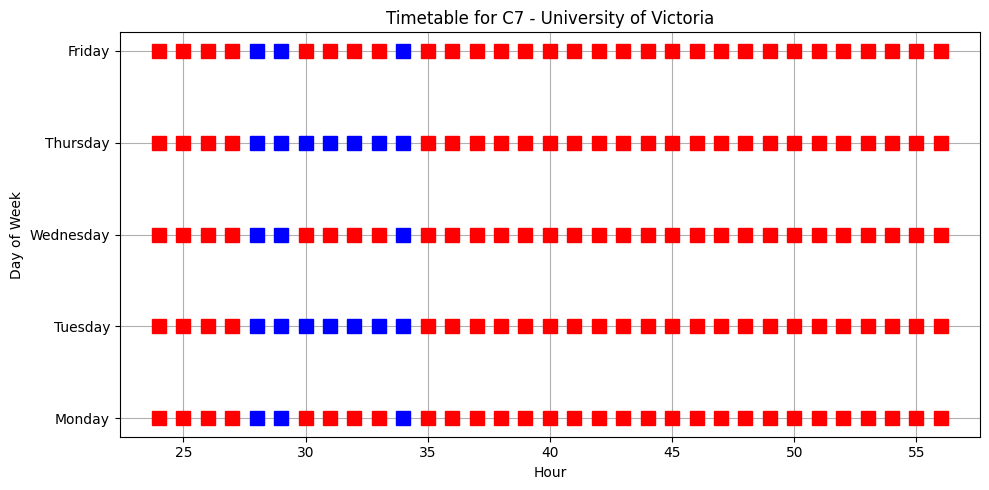

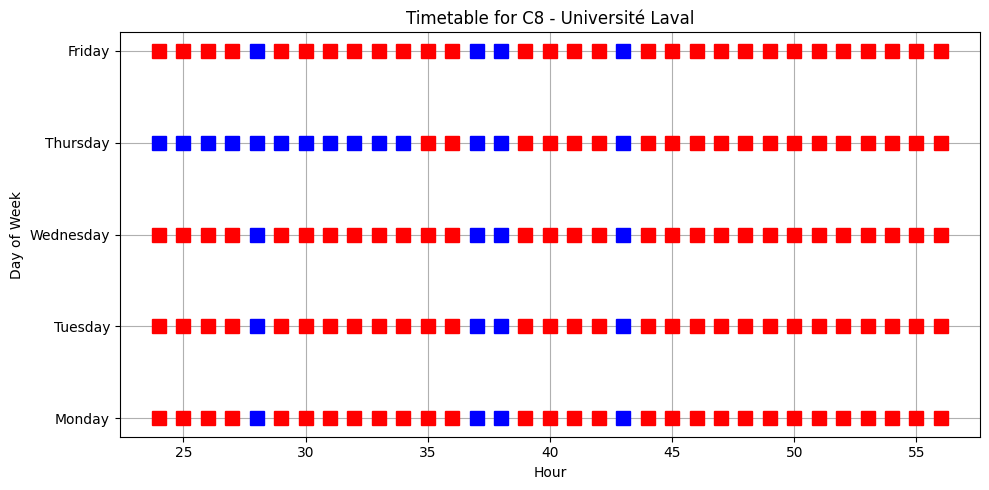

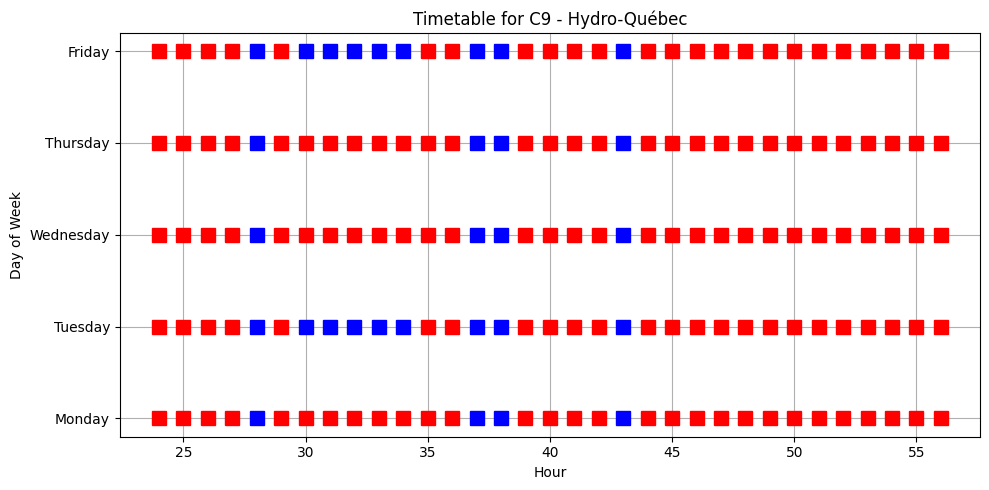

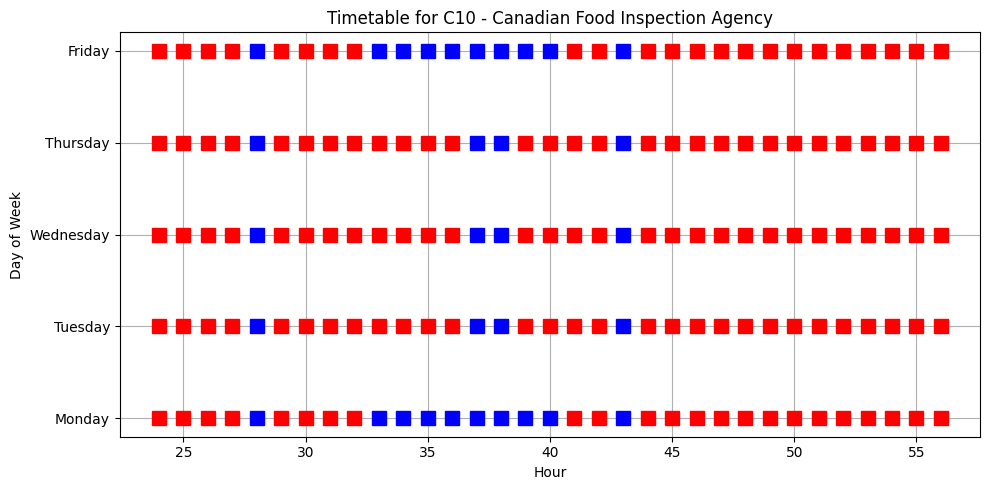

In [69]:
chairs_availability = raw_universities_map_to_schedule(chairs)
plot_schedule_map(chairs)

In [74]:



# Members 
# M1 University of Toronto T/Th 2 to 4
# M2 Toronto Metropolitan University M/W 1 o 3
# M3 University of Michigan T/F 9 to 11
# M4 École Polytechnique de Montréal M/Th 11 to 1
# M5 University of Guelph M/F 2 to 4
# M6 University of Calgary M/F 3 to 5
# M7 University of Prince Edward Island M 1 to 3
# M8 University of Manitoba M/W 10 to 12
# M9 National Research Council Th 8 to 12
# M10 Royal Military College of Canada F 11 to 1
# M11 Dalhousie University M/Th 11 to 1
# M12 University of Windsor M/F 2 to 4
# M13 Queen’s University M/F 3 to 5
# M14 The University of Western Ontario W 12 to 5
# M15 École Polytechnique de Montréal W/F 10 to 12
# M16 Université du Québec en Abitibi-Témiscamingue T/Th 1 to 3
# M17 Université du Québec à Trois Rivieres M/W 10 to 12
# M18 FPrimeC Solutions Inc. T/F 10 to 12
# M19 Institut national de la recherche scientifique Thu 10 to 3
# M20 Université du Québec à Chicoutimi T/Th 3 to 5
# M21 Université Catholique de Louvain M/T 1 to 3
# M22 University of Northern British Columbia Th 8 to 12
# M23 University of Saskatchewan M/T 10 to 12
# M24 University of Alberta T/W 3 to 5
# M25 University of Waterloo T/W 3 to 5
# M26 University of Alberta M/W 10 to 12
# M27 Brock University M/F 11 to 2
# M28 University of Cyprus T/Th 1 to 3
# M29 University of Manitoba F 12 to 4
# M30 McMaster University T/Th 8 to 10

members = {
    "M1": {
        "university": "University of Toronto",
        "unavailableTimes": {
            "T": [{"start": 14, "end": 16}],
            "Th": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M2": {
        "university": "Toronto Metropolitan University",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "W": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M3": {
        "university": "University of Michigan",
        "unavailableTimes": {
            "T": [{"start": 9, "end": 11}],
            "F": [{"start": 9, "end": 11}]
        },
        "timezone_offset": -5
    },
    "M4": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 13}],
            "Th": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -5
    },
    "M5": {
        "university": "University of Guelph",
        "unavailableTimes": {
            "M": [{"start": 14, "end": 16}],
            "F": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M6": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "M": [{"start": 15, "end": 17}],
            "F": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -7
    },
    "M7": {
        "university": "University of Prince Edward Island",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -4
    },
    "M8": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -6
    },
    "M9": {
        "university": "National Research Council",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M10": {
        "university": "Royal Military College of Canada",
        "unavailableTimes": {
            "F": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -5
    },
    "M11": {
        "university": "Dalhousie University",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 13}],
            "Th": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -4
    },
    "M12": {
        "university": "University of Windsor",
        "unavailableTimes": {
            "M": [{"start": 14, "end": 16}],
            "F": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M13": {
        "university": "Queen’s University",
        "unavailableTimes": {
            "M": [{"start": 15, "end": 17}],
            "F": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M14": {
        "university": "The University of Western Ontario",
        "unavailableTimes": {
            "W": [{"start": 12, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M15": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "W": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M16": {
        "university": "Université du Québec en Abitibi-Témiscamingue",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M17": {
        "university": "Université du Québec à Trois Rivieres",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M18": {
        "university": "FPrimeC Solutions Inc.",
        "unavailableTimes": {
            "T": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M19": {
        "university": "Institut national de la recherche scientifique",
        "unavailableTimes": {
            "Th": [{"start": 10, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M20": {
        "university": "Université du Québec à Chicoutimi",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "Th": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M21": {
        "university": "Université Catholique de Louvain",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "T": [{"start": 13, "end": 15}]
        },
        "timezone_offset": 1
    },
    "M22": {
        "university": "University of Northern British Columbia",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -8
    },
    "M23": {
        "university": "University of Saskatchewan",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "T": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -6
    },
    "M24": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "W": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -7
    },
    "M25": {
        "university": "University of Waterloo",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "W": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M26": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -7
    },
    "M27": {
        "university": "Brock University",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 14}],
            "F": [{"start": 11, "end": 14}]
        },
        "timezone_offset": -5
    },
    "M28": {
        "university": "University of Cyprus",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": 2
    },
    "M29": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "F": [{"start": 12, "end": 16}]
        },
        "timezone_offset": -6
    },
    "M30": {
        "university": "McMaster University",
        "unavailableTimes": {
            "T": [{"start": 8, "end": 10}],
            "Th": [{"start": 8, "end": 10}]
        },
        "timezone_offset": -5
    }
}



/var/folders/dh/k98322pj6lvbxs4484w64fsw0000gn/T/ipykernel_69906/785329258.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


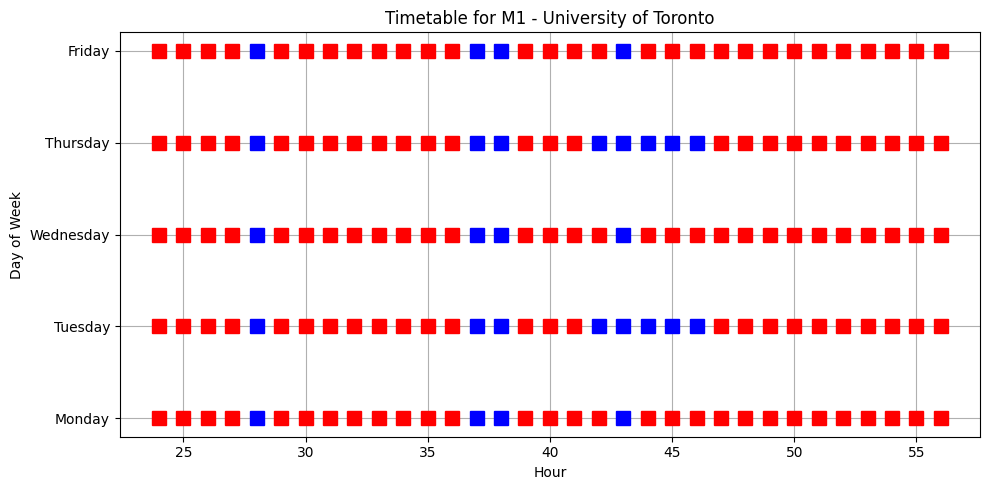

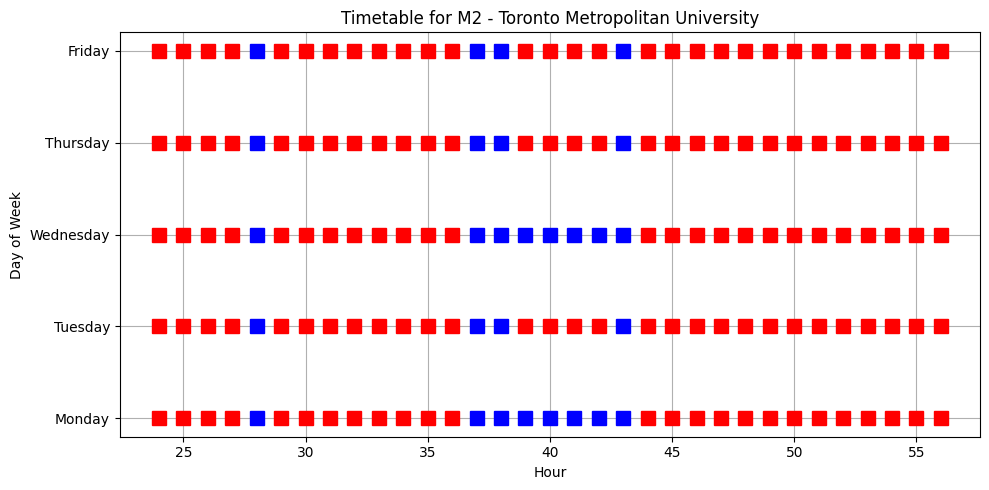

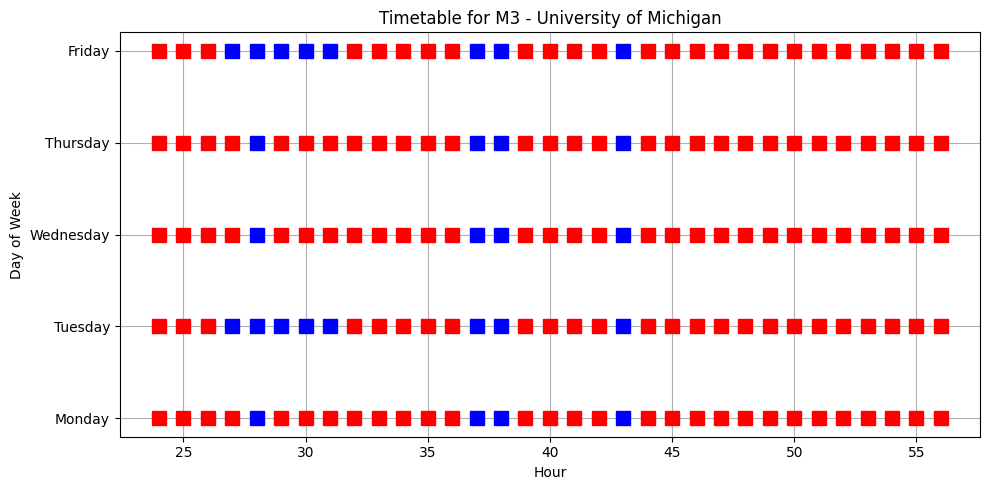

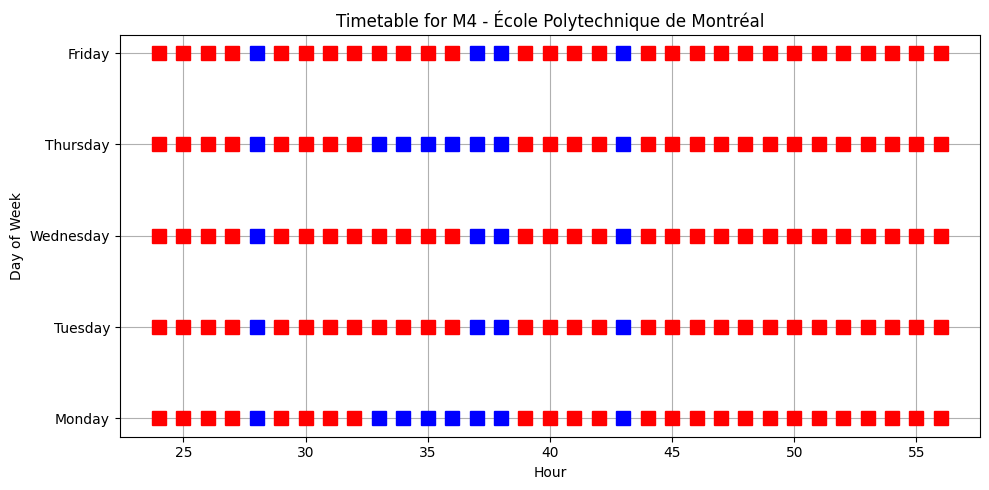

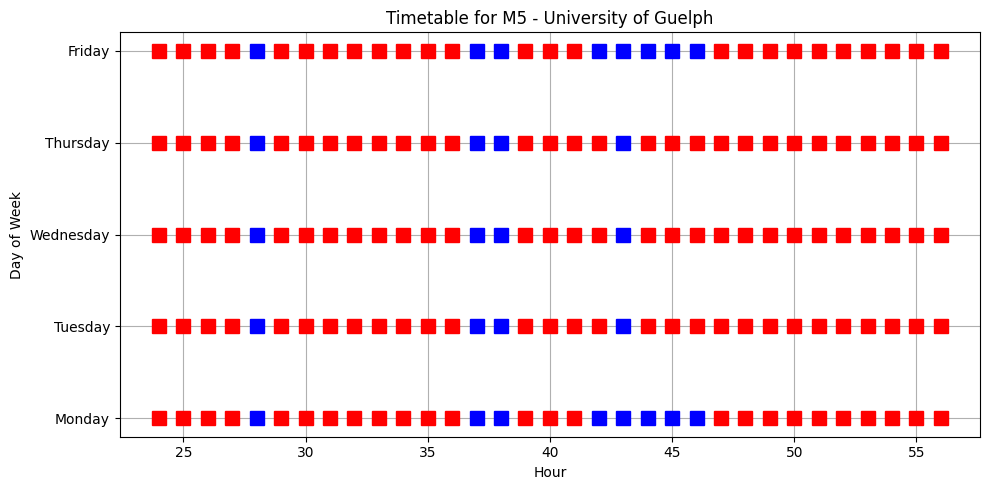

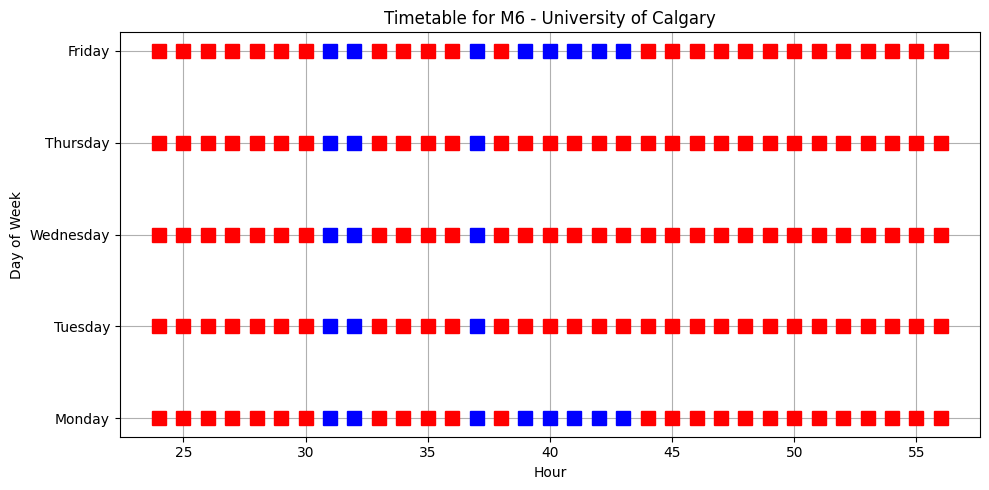

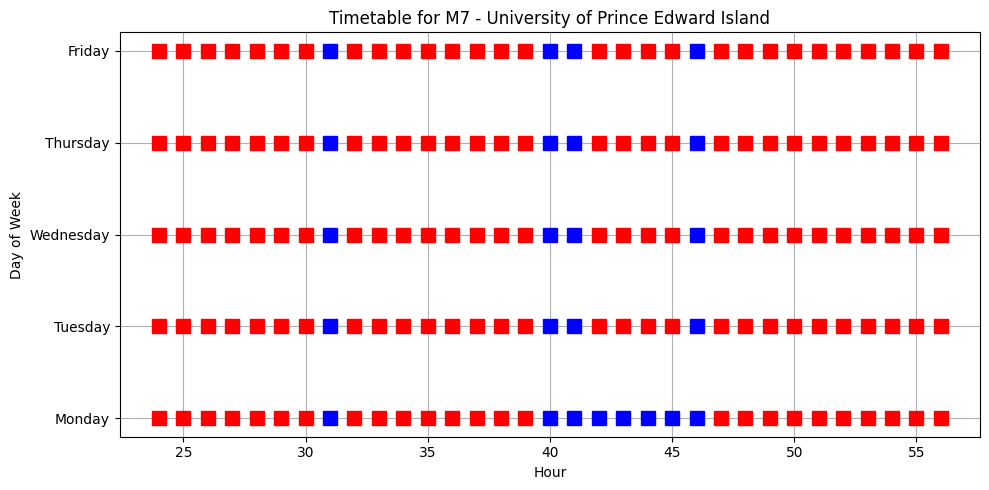

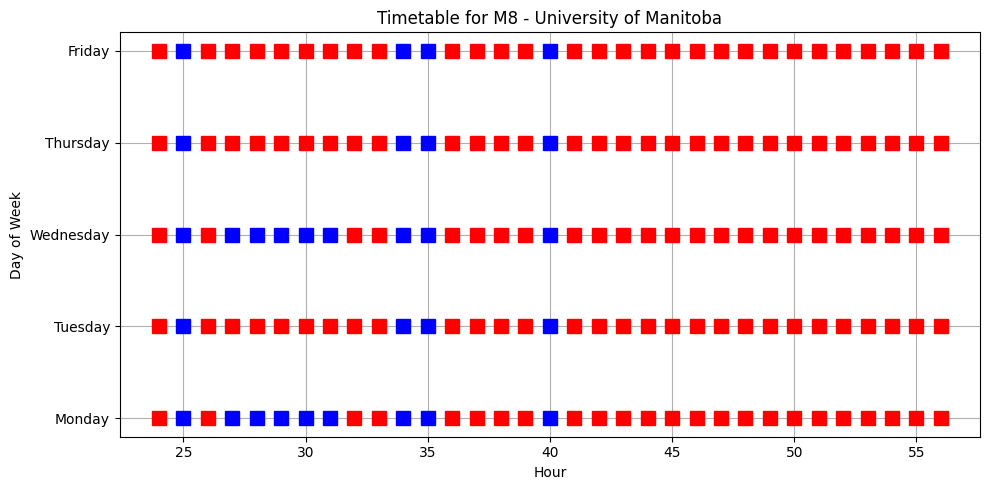

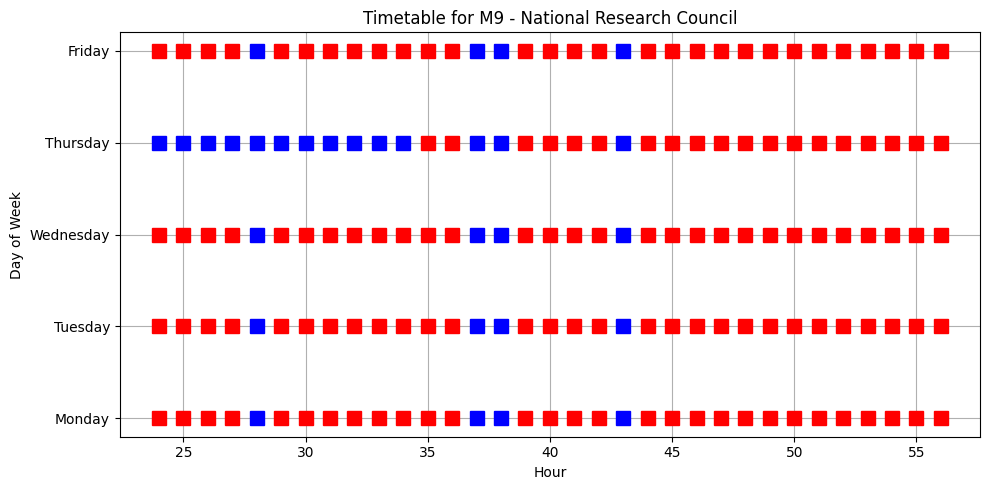

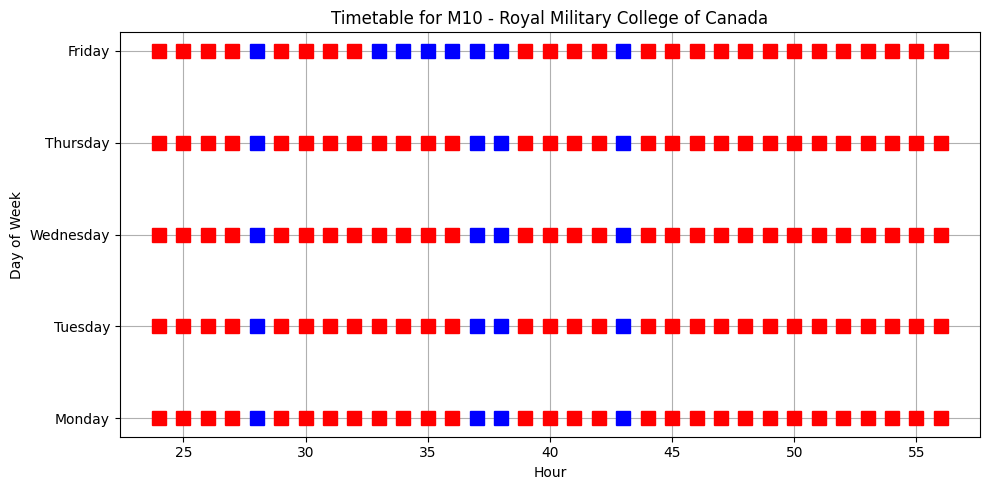

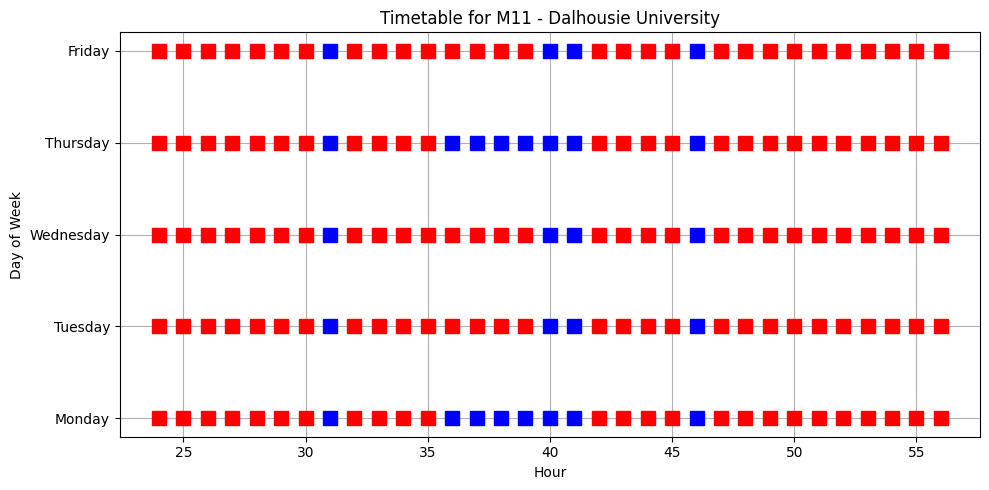

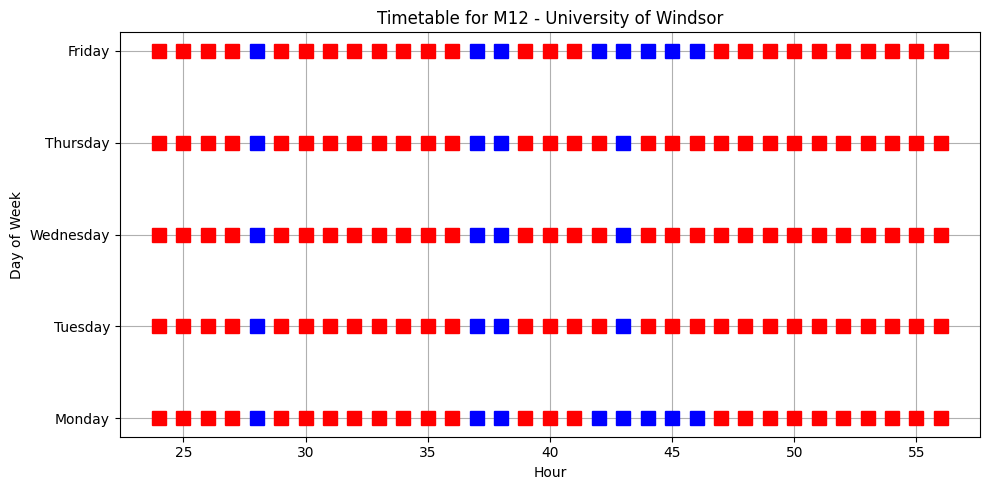

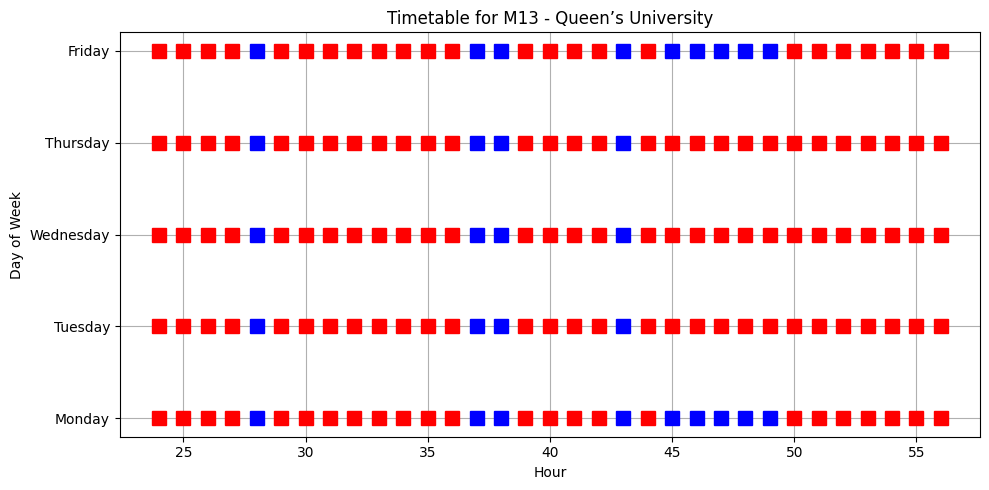

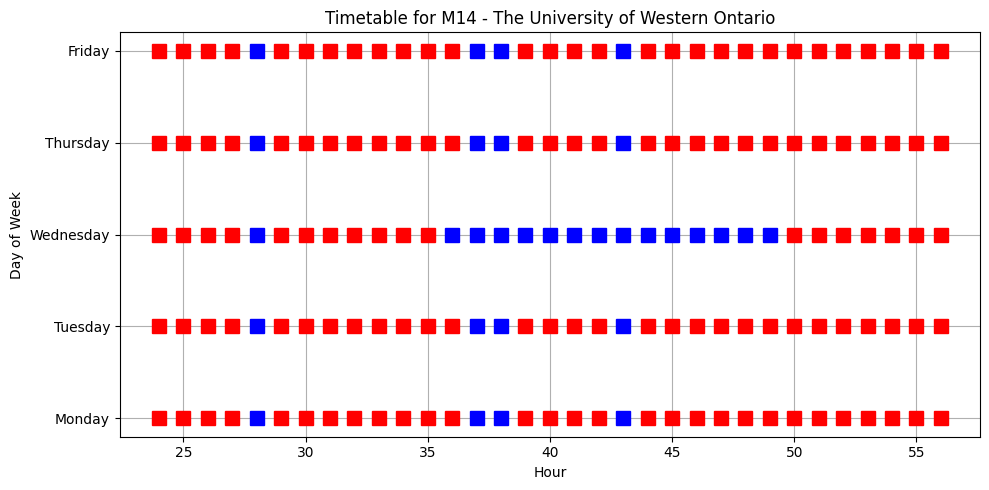

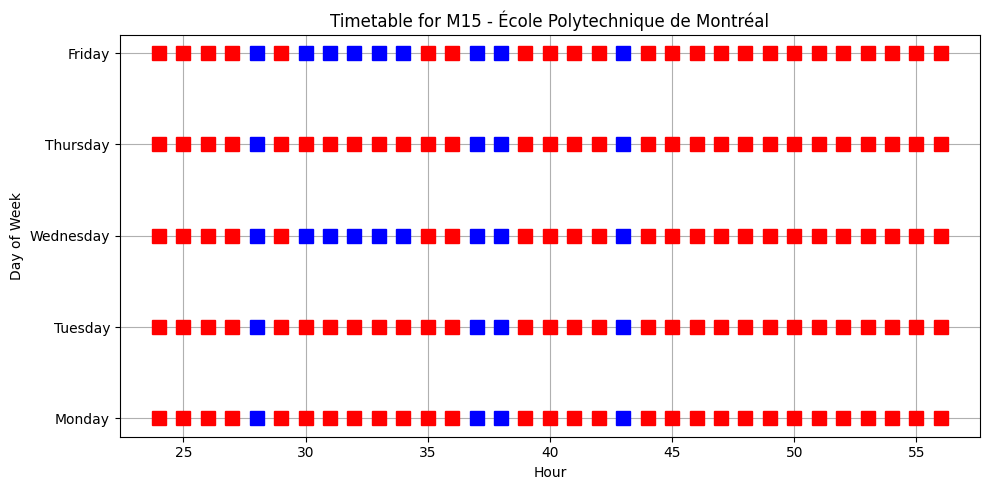

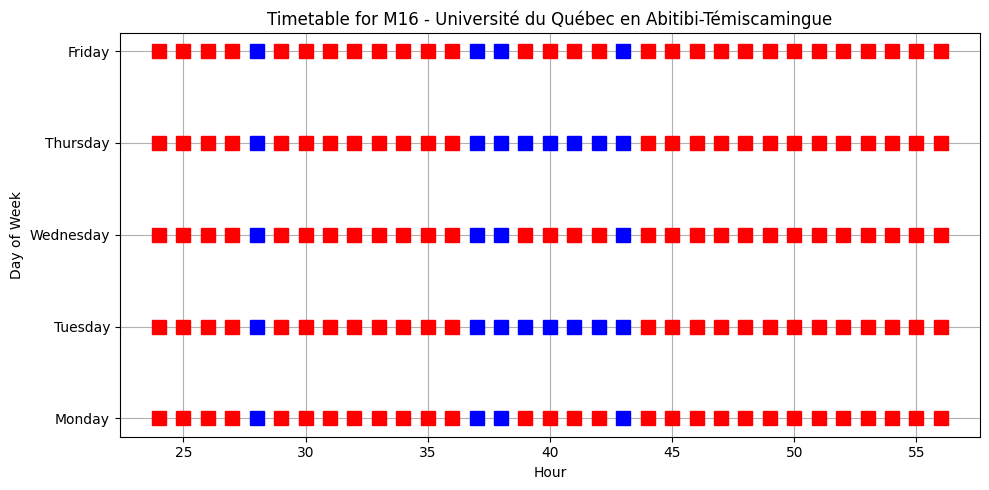

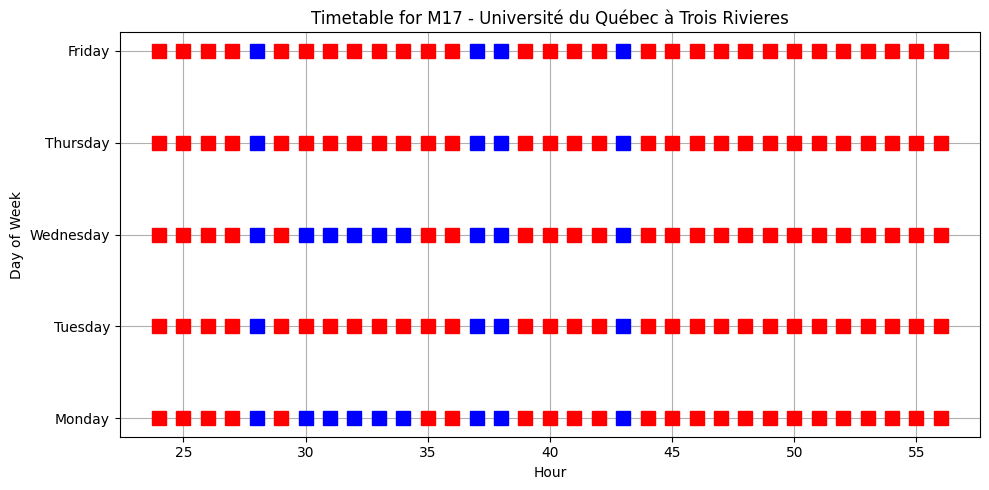

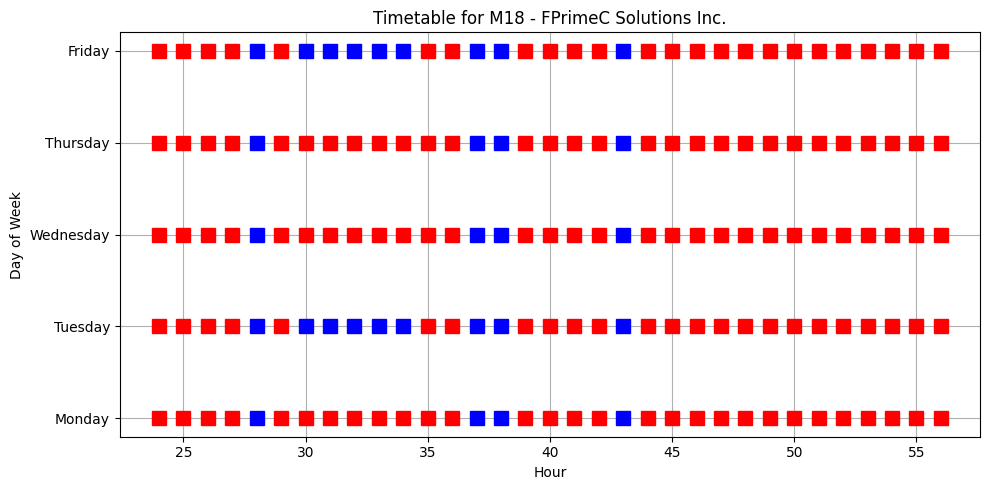

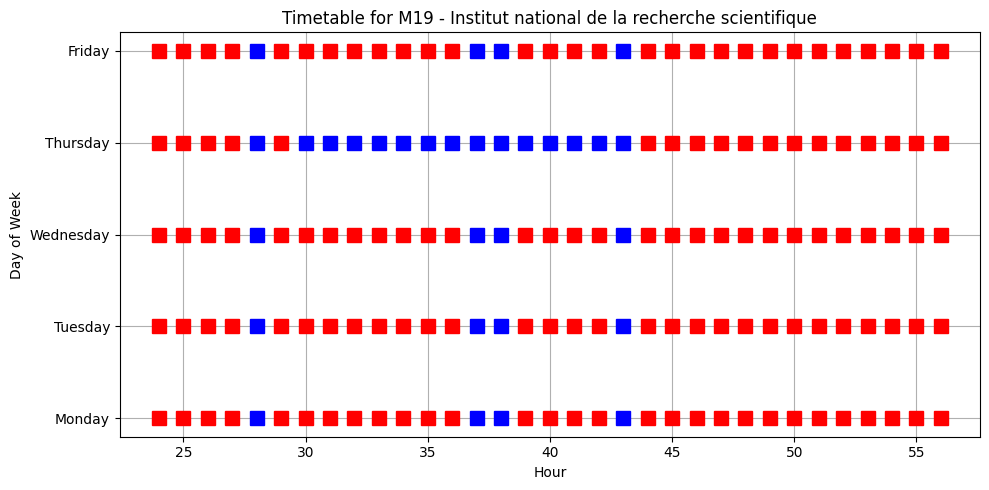

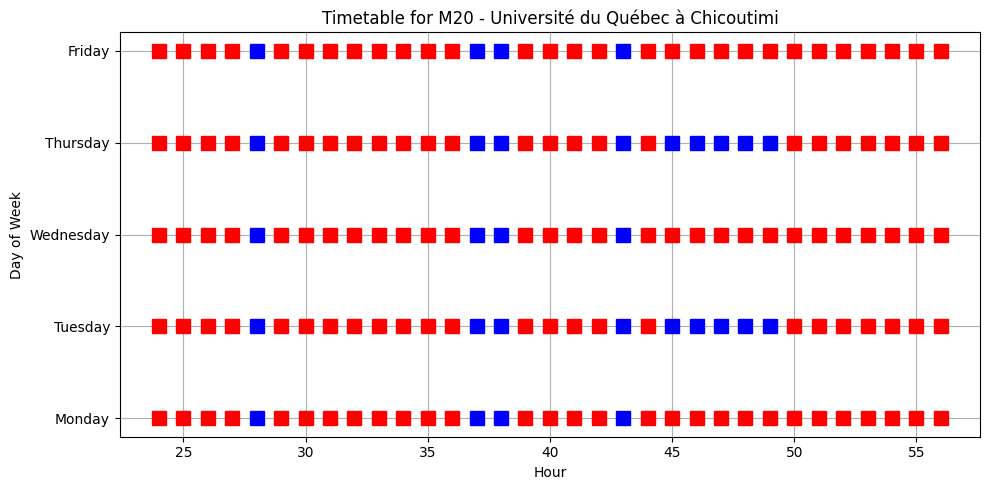

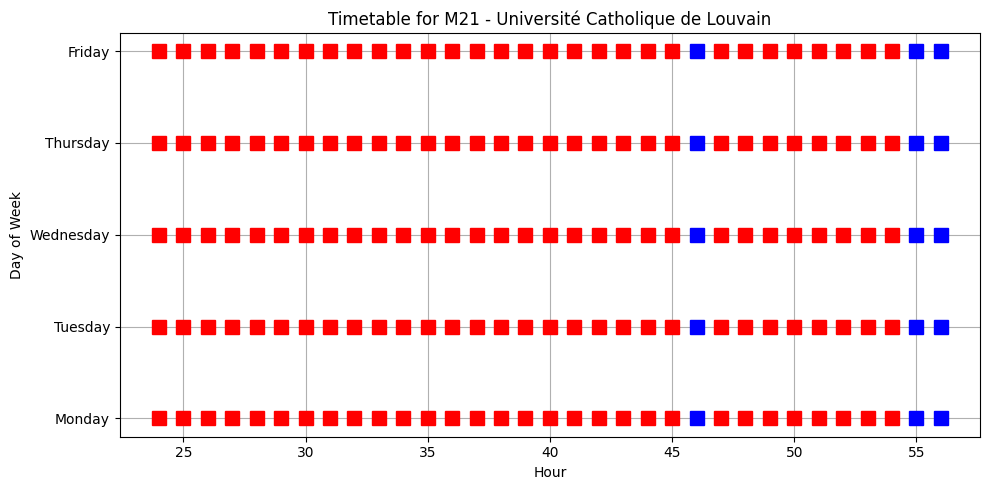

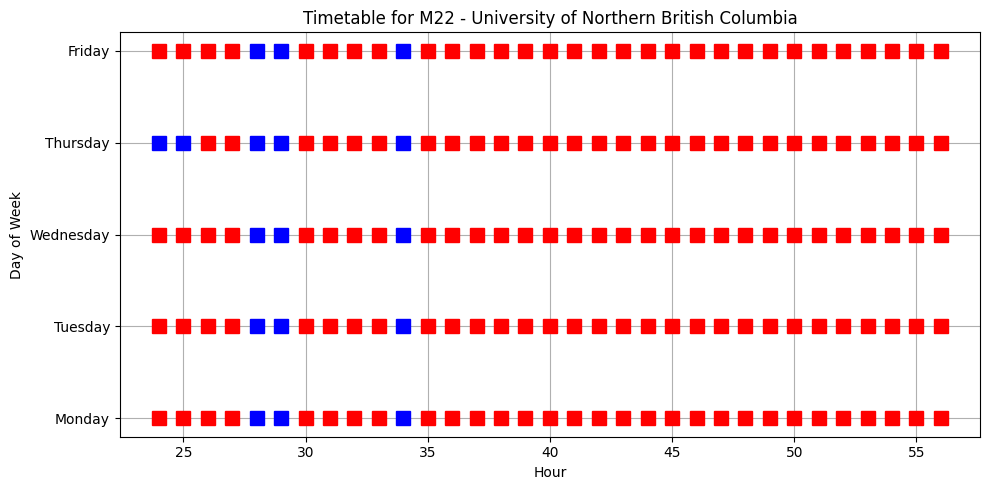

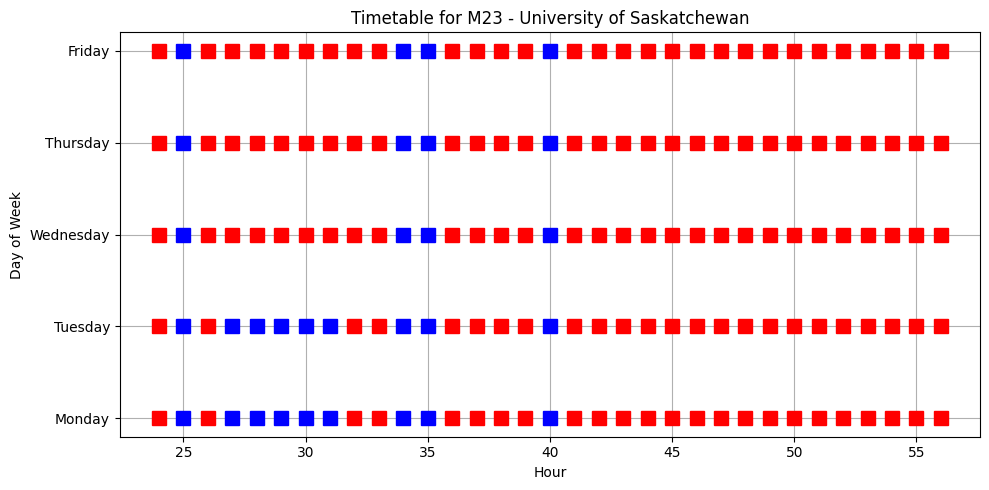

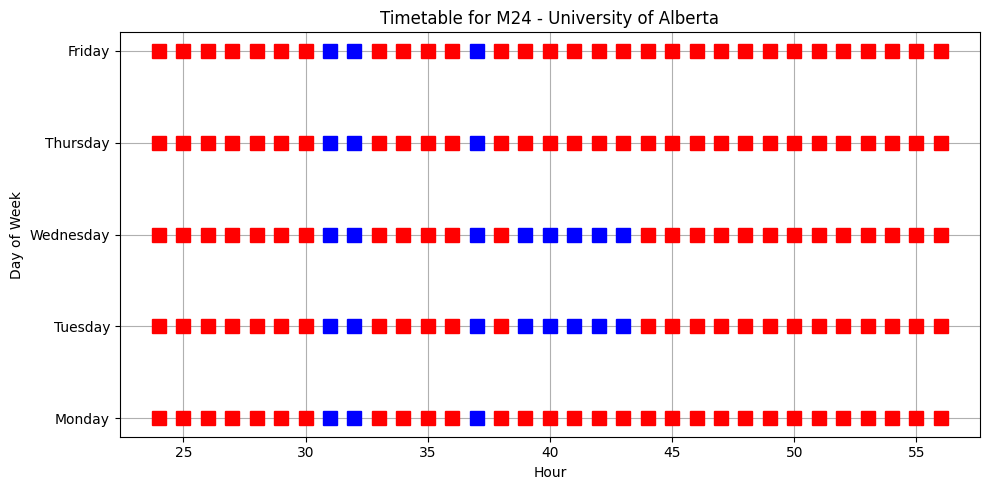

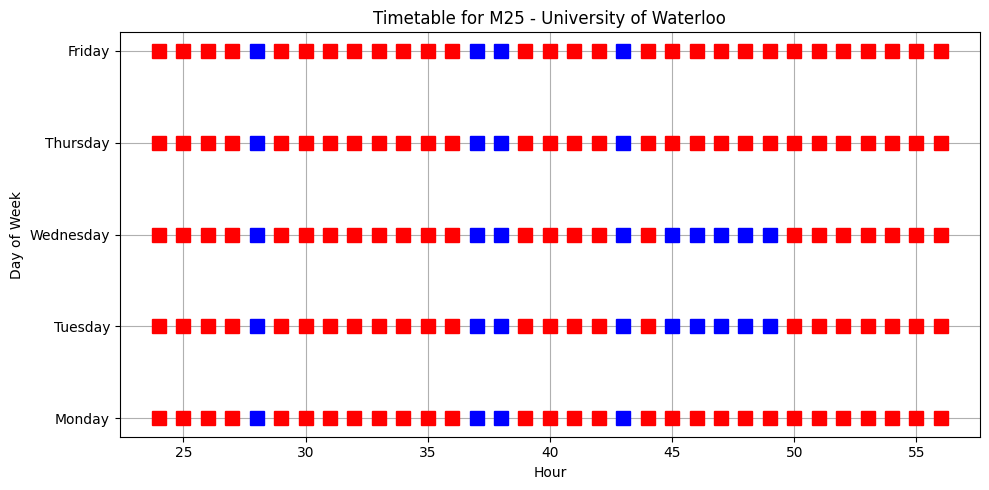

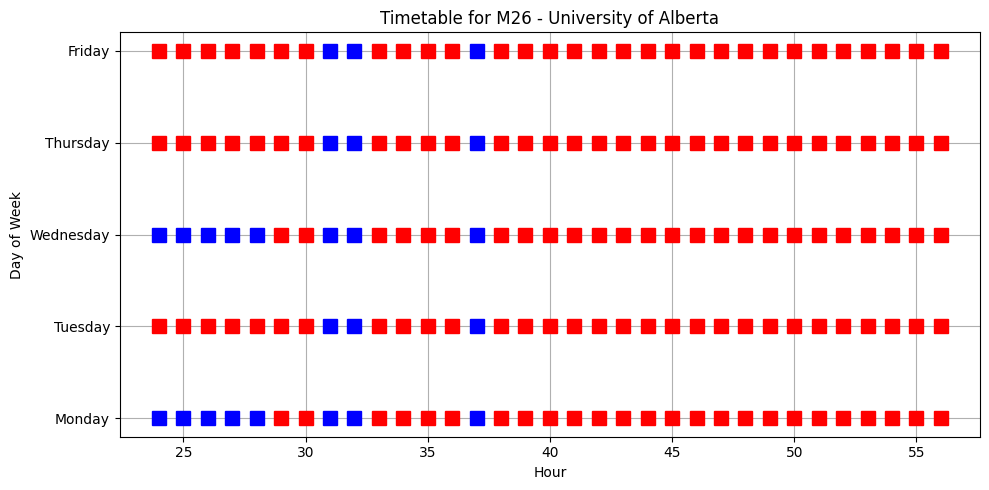

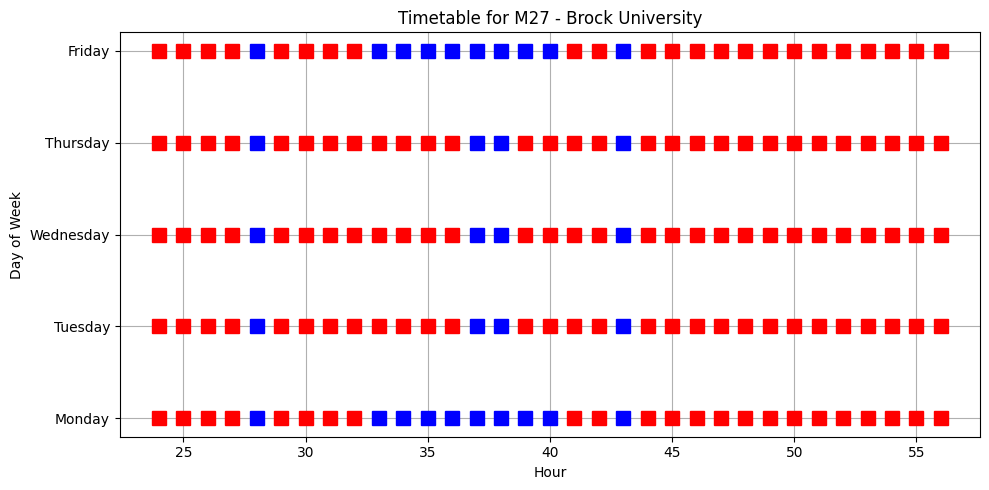

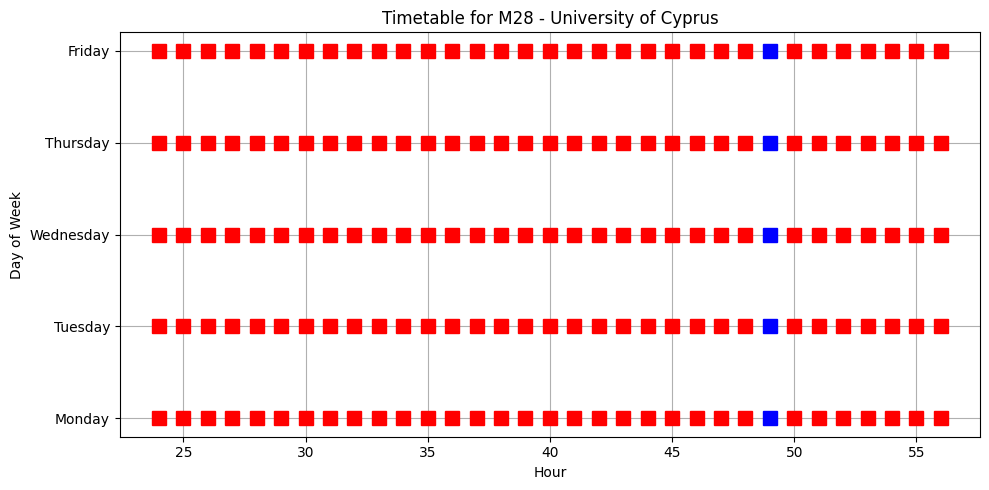

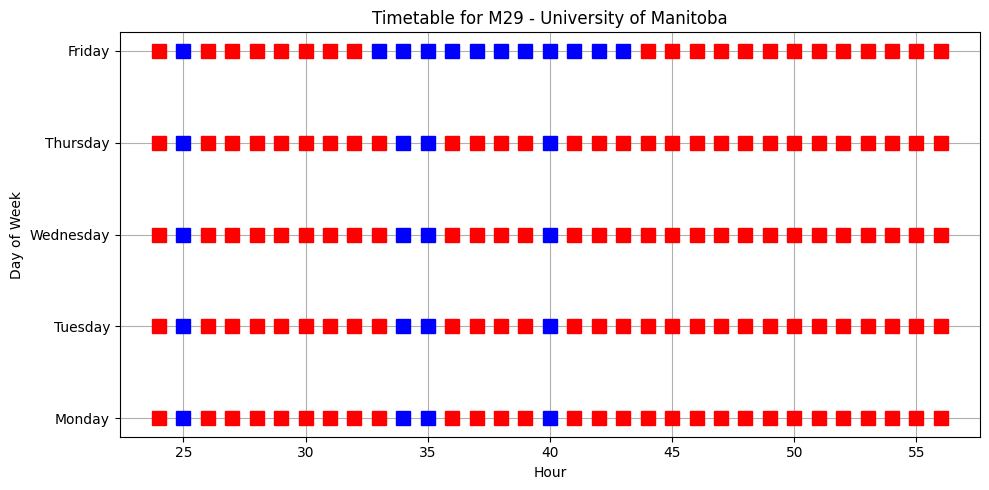

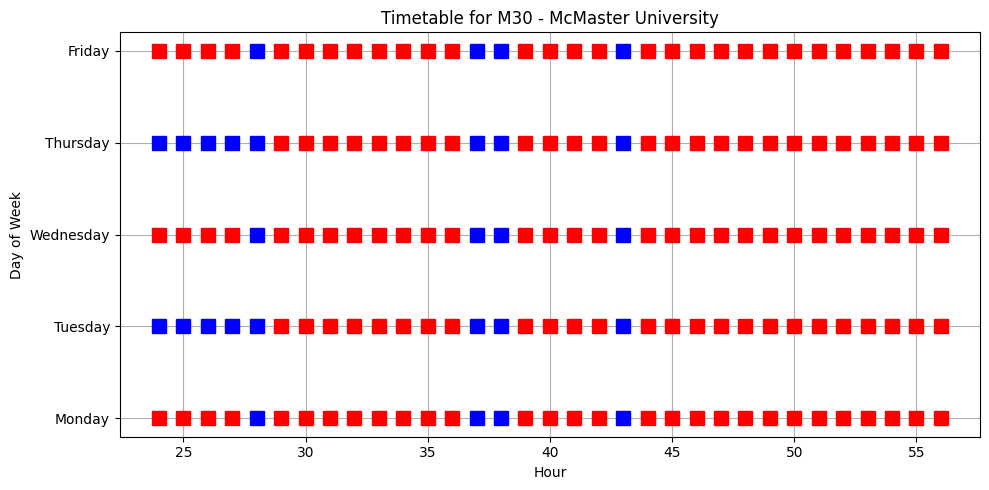

In [75]:
members_availability = raw_universities_map_to_schedule(members)
plot_schedule_map(members)

## Initial column Generation

Constraints:
- at most 4 meetings during 1 time slot
- 

In [ ]:
#